# 1. Import libraries

In [ ]:
#libraries
import re 
import en_core_web_sm
import nltk
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from io import StringIO
!pip install pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

# 2. Parse resume

In [54]:
# function to parse resume text
def resume_parser(fname, pages=None):
    if not pages:
        pagenums = set()
    else:
        pagenums = set(pages)
    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)
    infile = open(fname, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close
    return text

# call the resume_parser function to extract text from pdf file
resume_text = resume_parser("/content/Obianuju_Okafor_Resume.pdf")

# 3. Extract skills

In [68]:

# function to extract skills from resume text and select the most relevant skills
def extract_skills(resume_text):
  
    # remove punctuation
    resume_text = re.sub('[-,()\\.!?]', '', resume_text)
    
    # turn to lowercase
    resume_text = resume_text.lower()
    
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # tokenize resume text
    tokens = nltk.word_tokenize(resume_text)

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # remove the tokens that are stop-words
    stop_words = stopwords.words('english')

    tokens = [token for token in tokens if token not in stop_words]
  
    # read the skills.csv file (skills bank)
    data = pd.read_csv("skills.csv") 
    
    # create a list of all possible skills from our skills.csv file
    skills = list(data.columns.values)
   
   # create an array to add the relevant skills after coparison
    relevant_skills = []
    
    # compare one-grams (e.g python) skills from resume to skills from skills.csv, if there is a match add to relevant_skills array
    for token in tokens:
        if token.lower() in skills:
            relevant_skills .append(token)

    nlp_text = nlp(resume_text)
    # create bi-grams and tri-grams
    noun_chunks = nlp_text.noun_chunks
    
    # compare bi-grams and tri-grams (e.g machine learning) skills from resume to skills from skills.csv, if there is a match add to relevant_skills array
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            relevant_skills .append(token)
    
    return [i.capitalize() for i in set([i.lower() for i in relevant_skills])]

# call the extract_skills function to select relevant skills from resume text
relevant_skills = extract_skills(resume_text)

# 4. Create word cloud

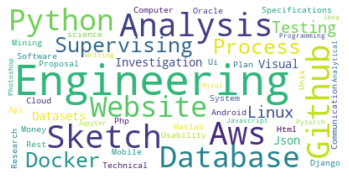

In [69]:
# convert relevant_skills array to a single string
relevant_skills_string = ''
relevant_skills_string += " ".join(relevant_skills)+" "
# create and generate a word cloud image using relevant_skills_strings
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(relevant_skills_string)
# display the generated image
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 5. Edit the word cloud shape to match your Linkedin header 

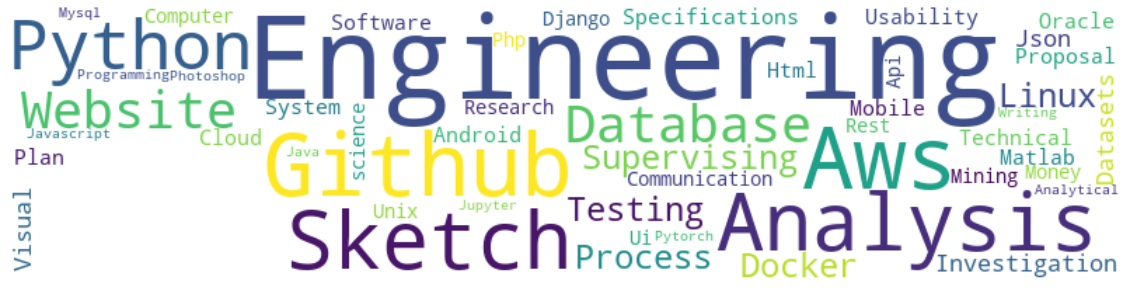

In [71]:
# create mask using Linkedin header template
linkedin_header_mask = np.array(Image.open("/content/linkedin_header_template.png"))

# create and generate a word cloud image using mask
wc = WordCloud(background_color="white", max_words=1000, mask=linkedin_header_mask,
               contour_width=3, contour_color='white').generate(relevant_skills_string)

# display the generated image
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# save generated wordcloud image as linkedin_wordcloud_header
wc.to_file("linkedin_wordcloud_header.png")